<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/decisionTree_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 22nd June, 2021
# Myfolder: D:\data\OneDrive\Documents\decision_trees
# Ref: https://towardsdatascience.com/a-guide-to-decision-trees-for-machine-learning-and-data-science-fe2607241956
# Objectives:
#            i) To quickly create a decision tree
#           ii) To see the decision tree
#          iii) Understand how impurity is calculated
#                a. Gini Index
#                b. Entropy
#           iv) Sensitivity of decision tree to changes in data
#            v) Instability of decision tree to rotation in data
#           vi) Parametric vs non-parametric models
#          vii) Overfitting in decision trees
#         viii) Regularising decision trees
#                a. Effect of max-depth
#                b. Effect of Min samples per leaf
#            ix) Learning curves
 

# Decision tree

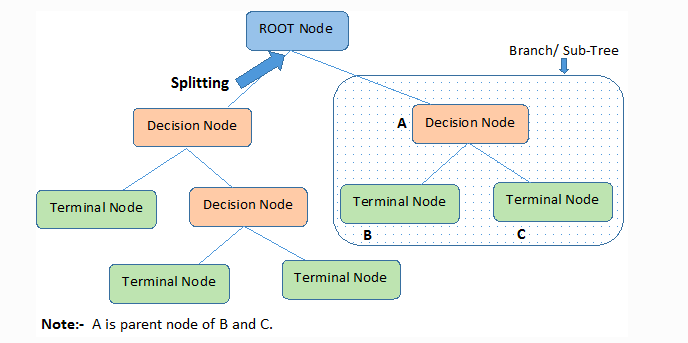

A small example of Decison tree formation

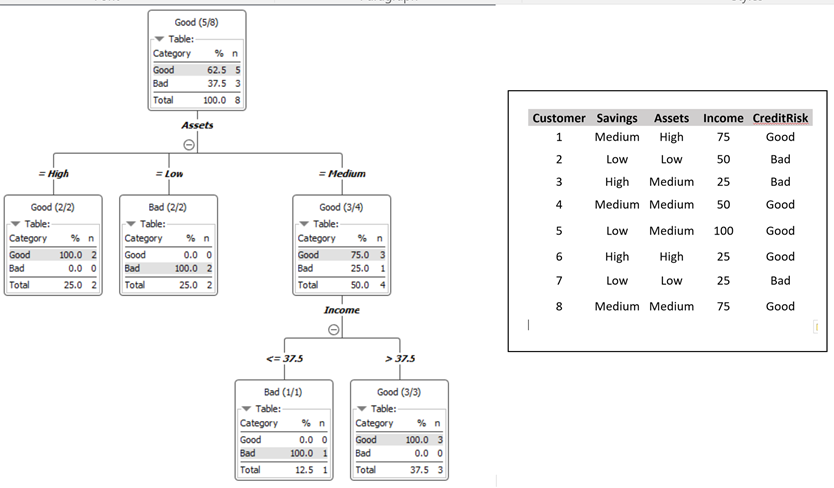

Another decision tree

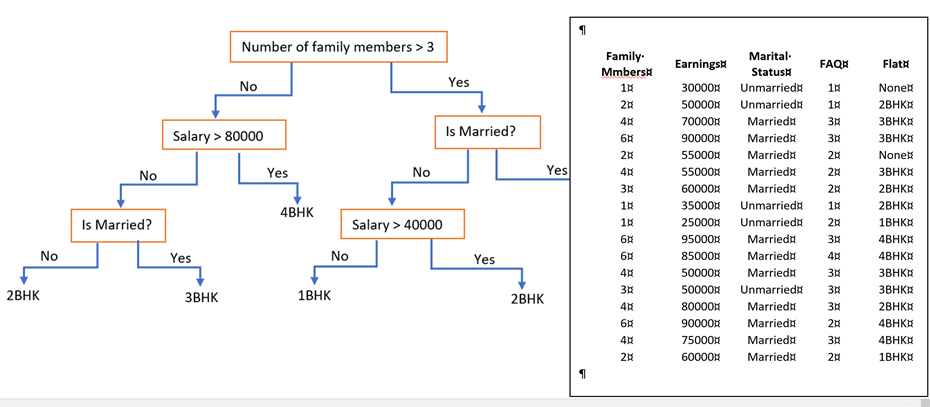

Decision tree building process

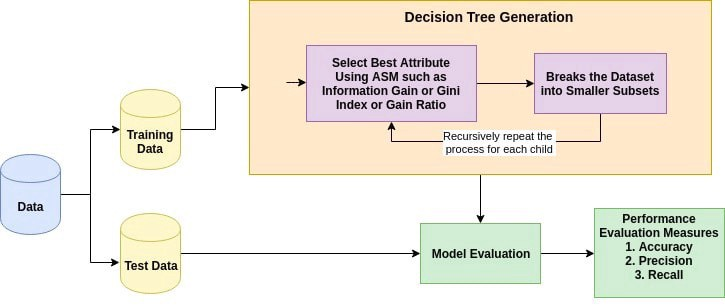

### Call libraries

In [27]:
# 1.0 Call libraries

import numpy as np
import pandas as pd
import os

# 1.1 Call sklearn libraries

# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.4 To draw decision tree
#from sklearn.tree import export_graphviz

# 1.1.5 Import iris
from sklearn.datasets import load_iris

# 1.1.6
# Install as:
#   conda install -c conda-forge python-graphviz 
#   conda install -c anaconda pydot
#import graphviz

# 1.1.7
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 1.1.8
from sklearn.datasets import make_classification

In [ ]:
# 1.2 For tree visualization

"""
Ref: https://stackoverflow.com/questions/33433274/anaconda-graphviz-cant-import-after-installation
Install on Anaconda using following two commands, as:

conda install python-graphviz
conda install -c anaconda pydot

"""

In [28]:
# 1.3 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Load data & explore

In [29]:
# 2.0 Get iris dataset
data = load_iris()
type(data)    # sklearn.utils.Bunch 
              # 'Bunch' is a dict that supports
              #  attribute-style access

sklearn.utils.Bunch

What is Bunch?  
Bunch is a subclass of the Dict class and supports all the methods as dict does. In addition, it allows you to use the keys as attributes. Bunch is just like dictionary but it supports attribute type access. 

In [30]:
# 2.1
X = data['data']                # Bunch being accessed like a dict
y = data['target']
col_names = data.feature_names  # Attribute like access in Bunch
target_name = data.target_names # Attribute like access


In [5]:
# 2.1.2
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [31]:
# 2.2 Create a DataFrame
iris = pd.DataFrame(X,columns=col_names)
iris['target'] = y

In [32]:
# 2.3 Explore data:

iris.head()
print()
iris.shape   # (150, 5)
print()
iris.dtypes
print("\n\n---Distribution of target value ---\n")
iris['target'].value_counts()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


(150, 5)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object



---Distribution of target value ---



0    50
1    50
2    50
Name: target, dtype: int64

### Process data

In [33]:
# 2.4 Standardize data:
#     Even though, for a decision tree,
#     data standardization is not needed,
#     but make it a habit to do so:

# 2.4.1 Instantiate object
ss = StandardScaler()

# 2.4.2 Train object on data
ss.fit(X)

# 2.4.3 Trandform data
X = ss.transform(X)

StandardScaler()

In [34]:
# 2.5 Split X and y into train and test data:

X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

# 2.5.1 About train data:
                                   
X_train.shape  # (105,4)
print()

# 2.5.2 Test data:

X_test.shape   # (45,4)
print()

(105, 4)

(45, 4)

### Decision tree modeling

In [35]:
# 3. Start modeling
# 3.1 Initialize our decision tree object.
#     Supply relevant parameters

ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [36]:
# 3.2 Train our decision tree:

ct.fit(X_train,y_train)

DecisionTreeClassifier()

### Predictions

In [37]:
# 4.0 Make predictions of test data
y_te = ct.predict(X_test)

In [38]:
# 4.1 Get accuracy:

np.sum((y_test == y_te))/y_test.size  # 0.93

0.9333333333333333

### Decision tree plot
Impurity index: gini
For any node calculate gini-index as: 1-

\begin{align}
        \mathbf{gini} = 1- \sum_{i=1}^n C^2
    \end{align}
where C is the probability of class 'C'. And 'n' is the number of classes.    

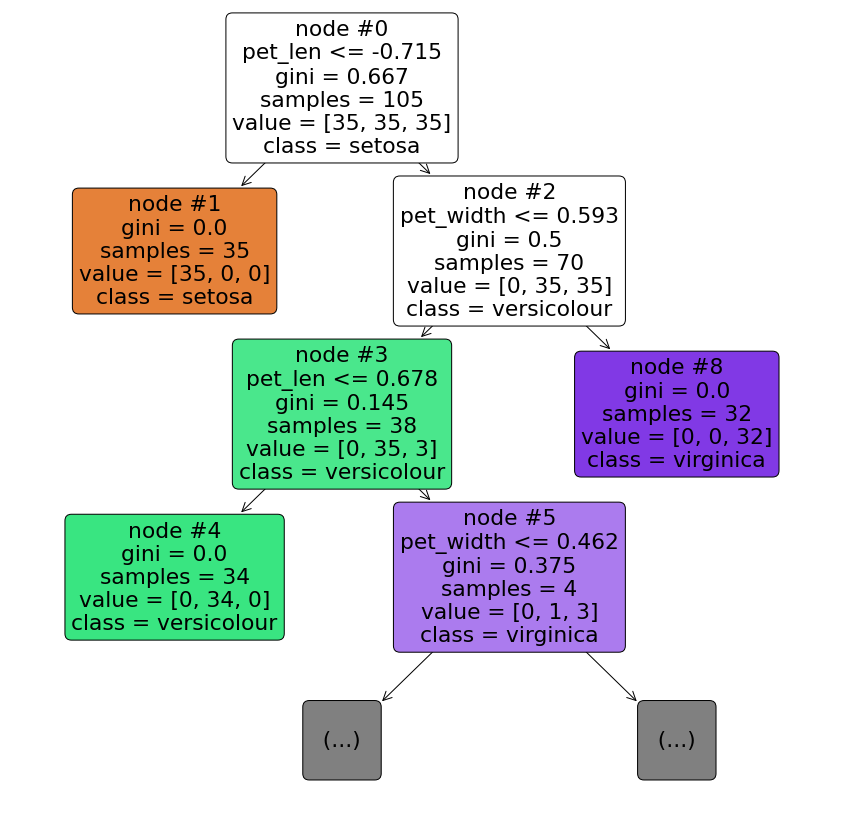

In [43]:
# 4.2 Plot decision tree
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["sep_len", "sep_width","pet_len","pet_width"],
            class_names = ["setosa","versicolour","virginica"]
            )

_=plt.show()

Thus gini-index at node #0 is <br>
>   1-((35/105)^2 + (35/105)^2 + (35/105)^2) <br> 

And at node #3 is <br>

>1-((0/38)^2 + (35/38)^2 + (3/38)^2)


### Decision tree plot
Impurity index: Entropy

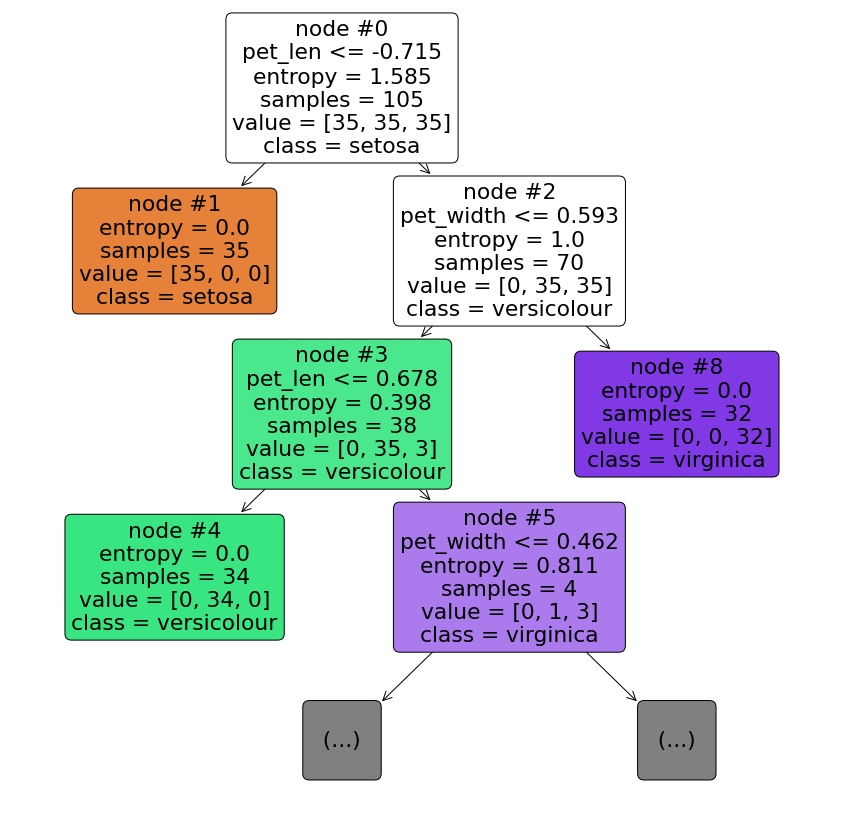

In [67]:
# 5.0 Plot decision tree with 'entropy' as criterion:

ct = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=ct.fit(X_train,y_train)

# 5.2
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["sep_len", "sep_width","pet_len","pet_width"],
            class_names = ["setosa","versicolour","virginica"]
            )

_=plt.show()

In [ ]:
# 5.3 Make predictions of test data
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size  # 0.93

In [ ]:
# 6.0 Entropy at Node #0 (sample calculations):

[-33/105*np.log2(33/105) - 33/105 * np.log2(33/105) - 39/105 * np.log2(39/105) ]

## Impurity criterion
Understanding Gini Index and Entropy


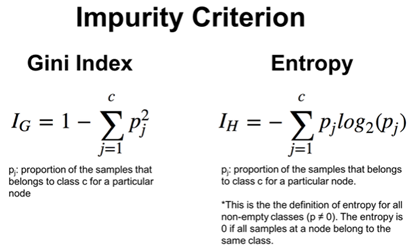

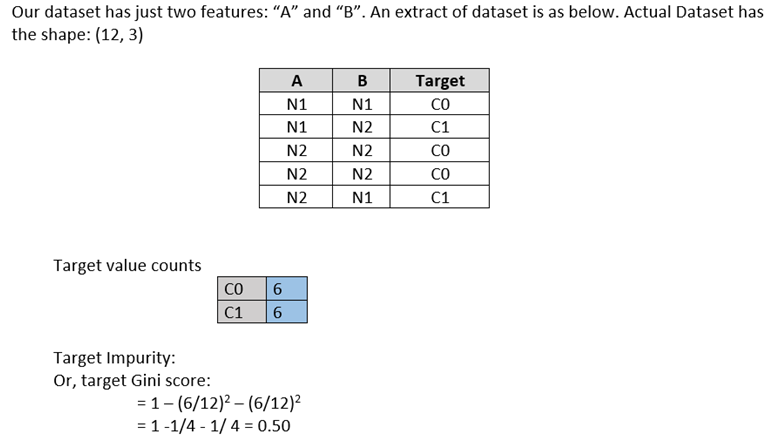

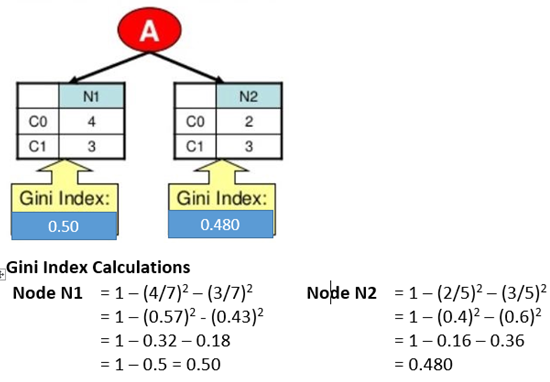

Which split is better? Split at "A" or at "B"?

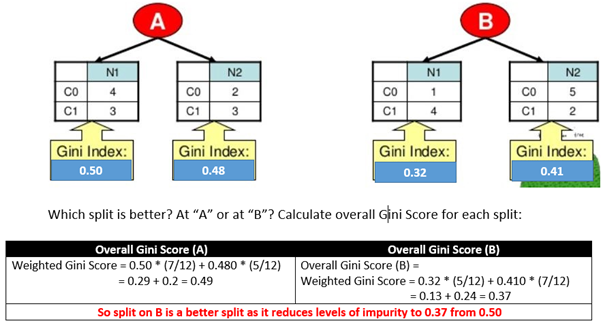

#### Gini-index vs Entropy
Graphs of gini-index and entropy when level of impurity changes from 0.1 to 0.9. Both graphs peak at the same time and fall to zero at the same time. Impurity is maximum when p = 0.5. 

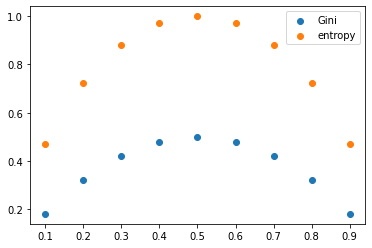

In [16]:
# 7.0 Let us assume our target has two levels.
import matplotlib.pyplot as plt
import numpy as np
# 7.1
gini = []
entropy = []
i = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 7.2
for p in i:
  gini.append(1 - p *p - (1-p) * (1-p))
  entropy.append( - p * np.log2(p) - (1-p) * np.log2(1-p) )

# 7.3 Plot both
_=plt.scatter(i,gini, label = "Gini")
_=plt.scatter(i,entropy, label = "entropy")
_=plt.legend()

### Feature importance

In [17]:
# 8.0 Which features are important:

fi = ct.feature_importances_
fi

array([0.01655372, 0.        , 0.65807216, 0.32537412])

In [18]:
# 8.1 Get a list of tuples:

list(zip(iris.columns, fi))  # Ist column is the least important

[('sepal length (cm)', 0.01655371897959129),
 ('sepal width (cm)', 0.0),
 ('petal length (cm)', 0.6580721623749888),
 ('petal width (cm)', 0.3253741186454198)]

In [19]:
######### Drop 'sepal length (cm)' and repeat above steps #############

# 9. Start modeling
# 9.1 Initialize our decision tree object
ct1 = dtree(
            criterion="gini",    # Alternative 'entropy'
            splitter="best",     # Alternative 'random'
            max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
            )

# 9.2 Train our decision tree 
#     Remove column at index: 0

ct1.fit(
        X_train[:,1:],
        y_train
        )

# 9.3 Now make predictions:
out = ct1.predict(X_test[:,1:])
out

DecisionTreeClassifier()

array([1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2, 1, 2, 0, 2,
       0])

In [20]:
# 9.4 Get accuracy
np.sum((out == y_test))/out.size

0.9555555555555556

##Parametric vs non-parametric model
Decison trees are non-parametric models. What does that mean. Read on....  

Very briefly parametric models make some assumptions regarding probability distribution of data (as for example in Linear regression models).  
Non-parametric models make no assumptions about distribution of data, as for example, KNN model, decsion tree models and SVM.

 How to insert a youtube video in Jupyter labs?  

See this github [link](https://gist.github.com/christopherlovell/e3e70880c0b0ad666e7b5fe311320a62).
In the following code, note the last part of URL: `https://www.youtube.com/embed/UgwUi8fu0CY`. The id, '`UgwUi8fu0CY`', identifies the video (it is the last part of your youtube URL: `https://www.youtube.com/watch?v=UgwUi8fu0CY`.

In [ ]:
# 7.0 See this YouTube Video

from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/UgwUi8fu0CY?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

-----
-----

## Problems with Decison trees

### Sensitive to slight changes in data
Depending upon which two rows get removed, the tree changes. Repeat the execution of following code multiple times.

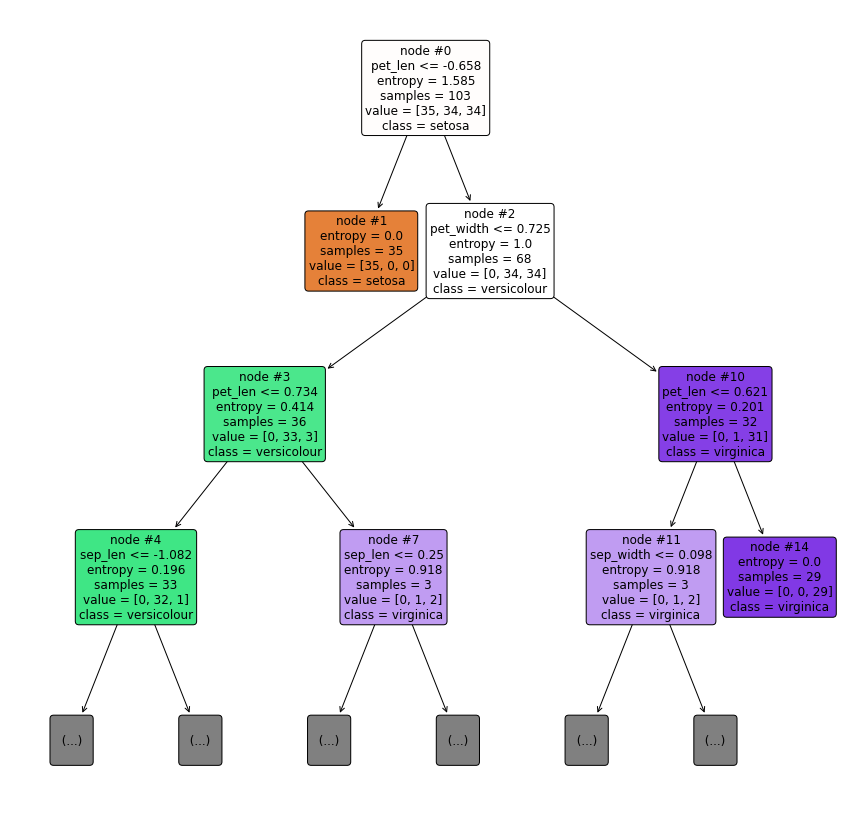

In [21]:
# 8.0 Remove just two rows and decision tree changes:
#     Sensitivity of decision trees to changes in data


X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

ct1 = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
##
_=ct1.fit(X_train[2:,:],y_train[2:])

##
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct1,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["sep_len", "sep_width","pet_len","pet_width"],
            class_names = ["setosa","versicolour","virginica"]
            )

_=plt.show()

### Instability of decison trees to rotation of data  
Instability can be reduced by having multiple trees (as in Random Forest)


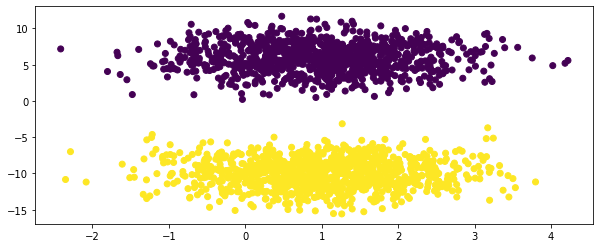

In [22]:
# 8.1 Generate some data:
def_rng = np.random.default_rng()
df = def_rng.multivariate_normal(
                                  mean = [1,6],
                                  cov =  [
                                          [1.0,0.0],
                                          [0.0,4.0]
                                          ],
                                  size = [1000]
                                 )

df1 = def_rng.multivariate_normal(
                                   mean = [1,-10],
                                   cov = [
                                          [1.0,0.0],
                                          [0.0,4.0]
                                          ],
                                   size = [1000]
                                  )
dfx = np.vstack([df,df1])
target = [0]*1000 + [1]*1000
_=plt.figure(figsize = (10,4))
_=plt.scatter(dfx[:,0], dfx[:,1], c = target)

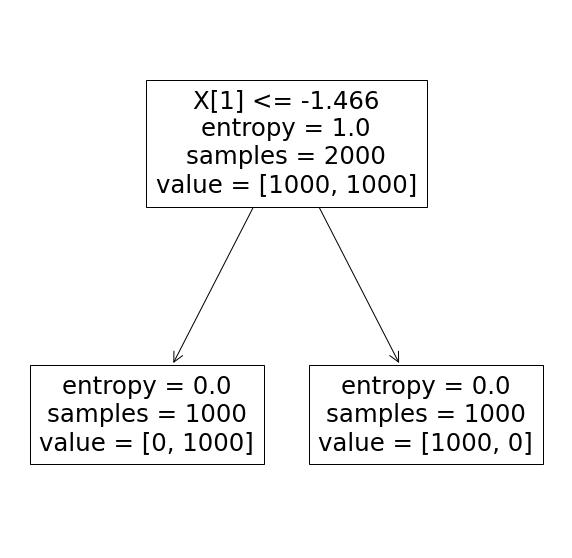

In [23]:
# 8.2 Draw a decison tree for above data
#     It is a very simple tree. Naturally
ct = dtree(criterion='entropy')
_=ct.fit(dfx,target)
_=plt.figure(figsize = (10,10))
_=plot_tree(ct, max_depth=2)

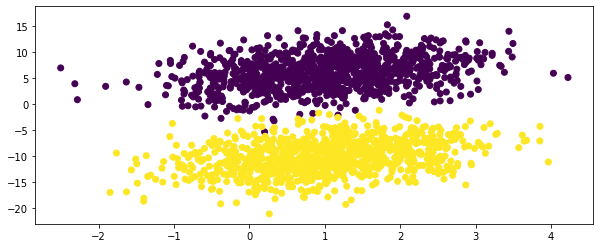

In [24]:
# 8.3 Next let us rotate the data a little bit:
#     Tree becomes more complex
df = def_rng.multivariate_normal(
                                 mean = [1,6],
                                 cov = [
                                         [1.0,1.0],
                                         [1.0,10.0]
                                        ],
                                size = [1000]
                                 )

df1 = def_rng.multivariate_normal(
                                   mean = [1,-10],
                                   cov = [
                                          [1.0,1.0],
                                          [1.0,10.0]
                                          ],
                                   size = [1000]
                                  )
dfx = np.vstack([df,df1])
target = [0]*1000 + [1]*1000
_=plt.figure(figsize = (10,4))
_=plt.scatter(dfx[:,0], dfx[:,1], c = target)

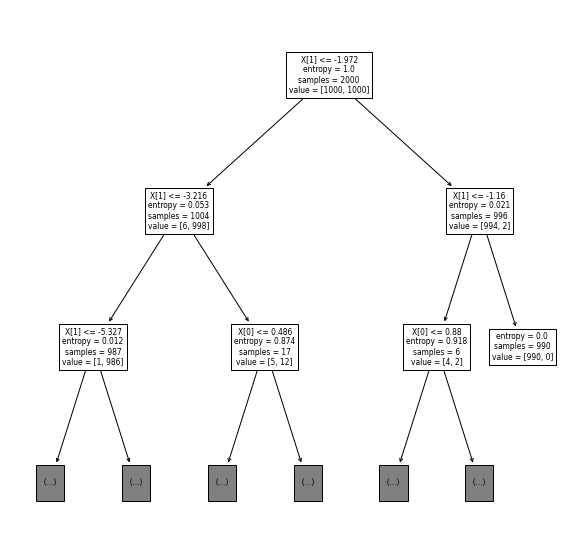

In [25]:
# 8.4 Draw a decison tree for above data
#     Tree becomes very complex
#     Even though there is a simple 
#     inclined stratight-line that separates
#     the two clusters:
ct = dtree(criterion='entropy')
_=ct.fit(dfx,target)
_=plt.figure(figsize = (10,10))
_=plot_tree(ct, max_depth=2)

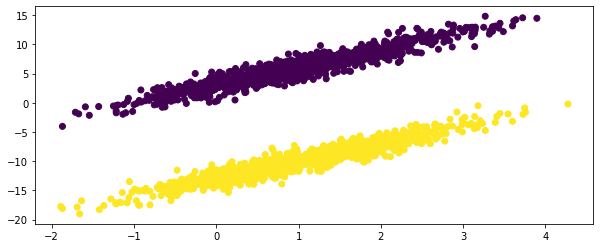

In [26]:
# 9.0 Following two data sources have
#     larger rotation.
df = def_rng.multivariate_normal(
                                 mean = [1,6],
                                 cov = [
                                         [1.0,3.0],  # Change 3.0 to see rotation effect
                                         [3.0,10.0]
                                        ],
                                size = [1000]
                                 )

df1 = def_rng.multivariate_normal(
                                   mean = [1,-10],
                                   cov = [
                                          [1.0,3.0], # Change 3.0 to see rotation effect
                                          [3.0,10.0]
                                          ],
                                   size = [1000]
                                  )
dfx = np.vstack([df,df1])
target = [0]*1000 + [1]*1000
_=plt.figure(figsize = (10,4))
_=plt.scatter(dfx[:,0], dfx[:,1], c = target)

----
----

## Regularising decision trees
(#10--#11.2)

Regularization in a broader sense implies avoiding overfitting in trees.

### What are underfitting and overfitting:
Refer this [link](https://www.kaggle.com/getting-started/166897) on Kaggle for a good disucssion and explanation. This same link also explains well bias-variance trade-off.

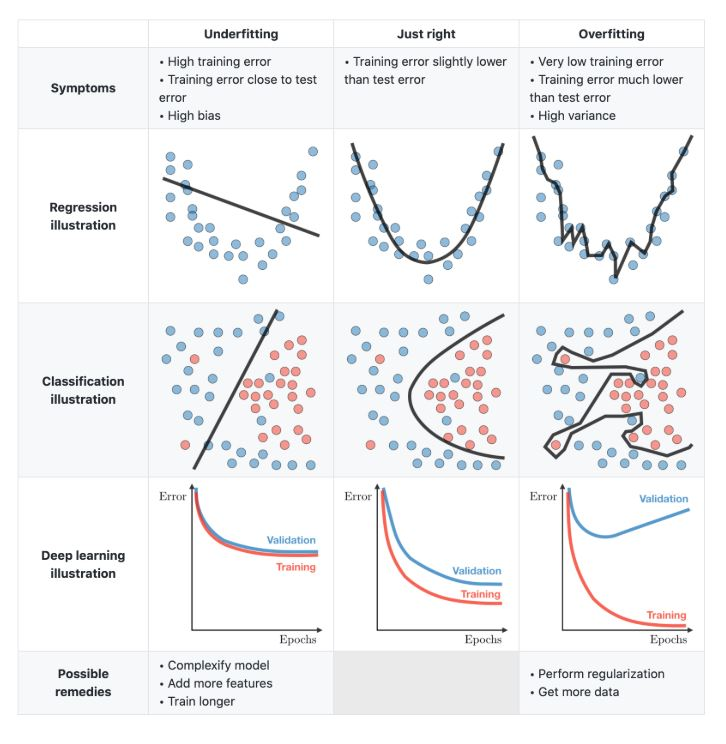

Column wise, extent of variance is same. Row-wise, extent of bias is same.  

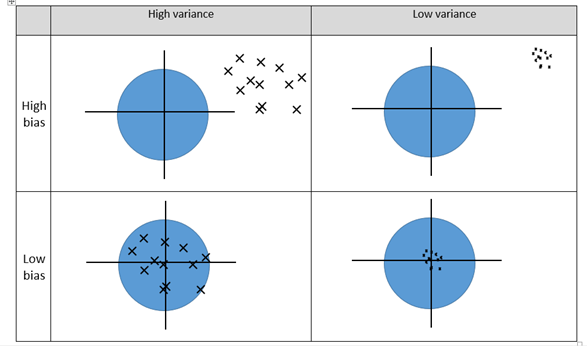

Overfitting may result in high variance in performance results in so far as test dataset is concerned. Errors in test-set will vary from one test-set to another and such errors will display large dispersions.   

Also different training-sets will produce differing models. In the following figure  noise points have also been modeled. As different training sets may have different noise points, models will show large variations.

> The **variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

>The **bias** error is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).

Please see this link for a better explanation of [variance](https://datascience.stackexchange.com/a/94008/64849).

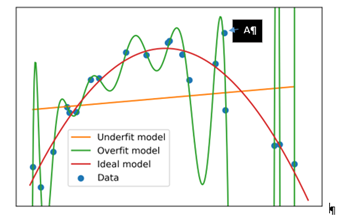

#### Why is there overfitting in decision trees?  
We will go through step-by-step tree formation. Our data has just two features--X and Y. Target has two classes: Red and Green. 
On the left is our data with two classes. Note that amongst the greens, there is a red dot and amongst the reds, there is a green dot. On the right, we create a root-node on 'X<6'.  Root node has two children with sample distribution as shown. 

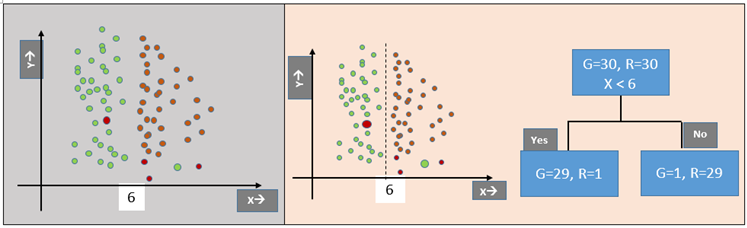

Nest step in tree building is as follows. The left-side of our dataset (not the right-side), we bifurcate on Y = 6. For, Y>6 we have all greens and for Y < 6, we have greens with one red.

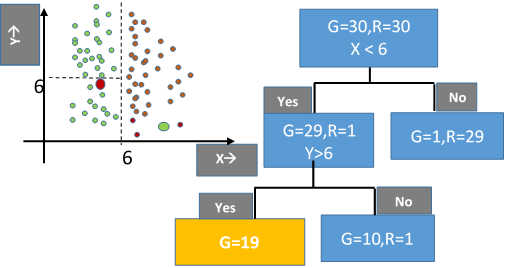

We continue to subset the left side. This time on Y=5.8. Between 5.8 and 6 there is one red point. Else it is all green.

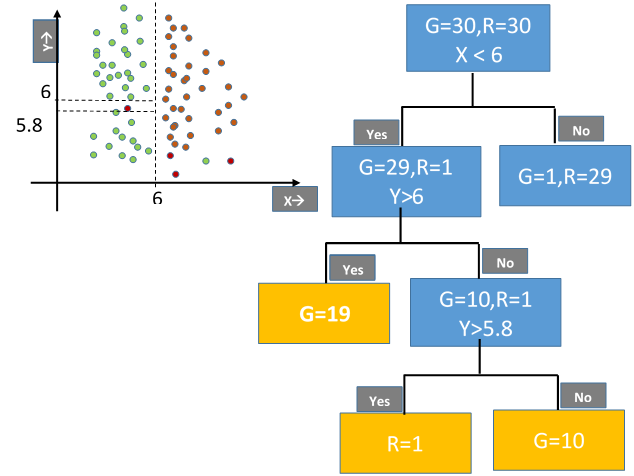

What if in the above tree, it was pruned at a higher level? We could have avoided noise.

### Experimenting with tree regularization

sklearn offers ways to regularize. One can attempt regularization in decision trees by increasing `min_*` parameter values and decreasing `max_*` parameter values. To get the correct values of parameters, draw and study learning curves. An example is given below:

#### Create and scale dataset

In [ ]:
# 10.0 Generate a noisy data
#      using sklearn's functions:

X,y= make_classification(
                         n_samples=10000,
                         n_features=20,
                         n_informative=10,  # Out of 20, 10 are informative features
                         n_redundant=2,     # Linear combinations of the informative features
                         n_repeated=0,      # Default
                                            # Remaining features are filled with random noise
                         n_classes=2,
                         flip_y = 0.1,      # Fraction of samples whose class is
                                            # assigned randomly. Larger values 
                                            #  introduce noise in the labels and
                                            #    make the classification task harder.
                         class_sep=1.0      # Lesser it is, the more difficult
                                             # the classification.  Larger values
                                             # spread out the clusters/classes and 
                                             # make the classification task easier.
                           
                         )

# 10.0.1
X.shape  # (10000, 20)
print()
y.shape  # (10000,)

(10000, 20)

(10000,)

In [ ]:
# 10.1 Scale the dataset:
#      WRONG WAY TO SCALE
#      DATA LEAKAGE OCCURS HERE
#      SHOULD TAKE PLACE AFTER SPLITTING

ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
# 10.2 Split the dataset:

X_train,X_test,y_train,y_test = train_test_split(
                                                  X,y,
                                                  test_size = 0.3,
                                                  shuffle = True
                                                 )

X_train.shape  # (7000,20)
print()
X_test.shape   # (3000,20)

(7000, 20)

(3000, 20)

#### Learning curves 
Effect of max-depth on error  

Very low max-depth indicates underfitting. Very high max-depth leads to overfitting.

In [ ]:
# 10.3 Observe the effect of max_depth
#      on model accuracy:

# 10.3.1
error_test = []
error_train = []

# 10.3.2 
for depth in range(1,28):

  # 10.3.3 Instantiate the DecisionTreeClassifier
  ct = dtree(max_depth= depth)
  _=ct.fit(X_train,y_train)

  # 10.3.4 Predict target with X_test 
  #        and calcluate error in prediction
  y_per = ct.predict(X_test)
  acc = (y_per == y_test).sum()/y_test.size
  error_test.append(1-acc)

  # 10.3.5 Predict target with X_train and
  #        calculate error
  y_per = ct.predict(X_train)
  acc = (y_per == y_train).sum()/y_train.size
  error_train.append(1-acc)


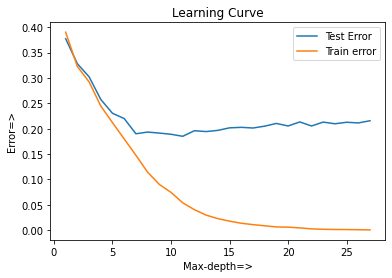

In [ ]:
# 10.4 Define a function to plot learning curve

_=plt.plot(range(1,28), error_test, label = "Test Error")
_=plt.plot(range(1,28), error_train, label = "Train error")
_=plt.xlabel("Max-depth=>")
_=plt.ylabel("Error=>")
_=plt.title("Learning Curve")
_=plt.legend()

Effect of min samples per leaf on error

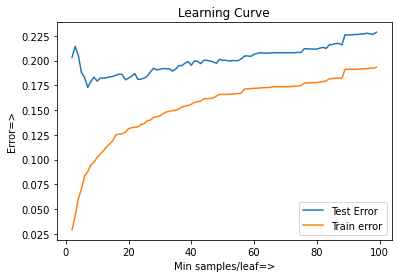

In [ ]:
# 11.1 Observe the effect of Min samples per leaf
#      on model error:

# 11.1.1
error_test = []
error_train = []
start_pt = 2     # min samples will vary from start_pt
end_pt = 100     #  to end_pt

# 11.1.2 
for msl in range(start_pt,end_pt):

  # 11.1.3 Instantiate the DecisionTreeClassifier
  ct = dtree(min_samples_leaf= msl)
  _=ct.fit(X_train,y_train)

  # 11.1.4 Predict target with X_test 
  #        and calculate error
  y_per = ct.predict(X_test)
  acc = (y_per == y_test).sum()/y_test.size
  error_test.append(1-acc)

  # 11.1.5 Predict target with X_train and
  #        calculate error
  y_per = ct.predict(X_train)
  acc = (y_per == y_train).sum()/y_train.size
  error_train.append(1-acc)


# 11.2 Plot tree-depth vs Min samples per leaf
#      Obviouly train error is minimum
#      when number of leaf samples is the least

_=plt.plot(range(start_pt,end_pt), error_test,  label =  "Test Error" )
_=plt.plot(range(start_pt,end_pt), error_train, label =  "Train error")
_=plt.xlabel("Min samples/leaf=>")
_=plt.ylabel("Error=>")
_=plt.title("Learning Curve")
_=plt.legend()

<b>Graph shows--Overfitting=>fitting=> Underfitting</b>

When Min samples/leaf is very small, tree has almost full depth. Training error is very small and there is high overfitting. As Min samples/leaf increase, model tends to become more generalized with test error reducing and training error increasing (from near zero onwards). When min samples/leaf tend to become very large, underfitting begins to occur--model is becoming very simple. Underfitting brings large errors both in test data and also in training data.



In [ ]:
######## I am done ##############